In [10]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from src.utils.kaggle import read_data_set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

df = read_data_set("data/raw/Student_Performance.csv")

### Dataset Characteristics

| Feature                          | Definition                                                      | Unit                    |
| -------------------------------- | --------------------------------------------------------------- | ----------------------- |
| Hours Studied                    | The total number of hours spent studying by each student.       | int64                   |
| Previous Scores                  | The scores obtained by students in previous tests.              | int64                   |
| Extracurricular Activities       | Whether the student participates in extracurricular activities. | object (Yes or No)      |
| Sleep Hours                      | The average number of hours of sleep the student had per day.   | int64                   |
| Sample Question Papers Practiced | The number of sample question papers the student practiced.     | int64                   |
| **Performance Index**            | **A measure of the overall performance of each student.**       | **float64 [10 to 100]** |

[Source](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data)


### Remove duplicate records


In [11]:
df.duplicated().sum()

np.int64(127)

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

### Split train and test sets


In [13]:
target_col = "Performance Index"
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
print(train_data.shape, test_data.shape)

(6911, 6) (2962, 6)


### Categorical columns


In [14]:
categorical_cols = train_data.select_dtypes(include=["object"]).columns.tolist()
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
one_hot_encoded = encoder.fit_transform(train_data[categorical_cols])
one_hot_encoded = pd.DataFrame(
    one_hot_encoded,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=train_data.index,
)

# drop original columns and concatenate the encoded DataFrame
train_data.drop(categorical_cols, axis=1, inplace=True)
train_data = pd.concat([train_data, one_hot_encoded], axis=1)
train_data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
4066,7,84,4,3,75.0,1.0,0.0
7268,6,82,6,0,72.0,1.0,0.0
3715,8,83,9,6,81.0,0.0,1.0
5619,6,60,6,6,48.0,1.0,0.0
9311,3,94,7,0,76.0,0.0,1.0


In [15]:
train_data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Extracurricular Activities_No       0
Extracurricular Activities_Yes      0
dtype: int64

### EDA


<Figure size 640x480 with 0 Axes>

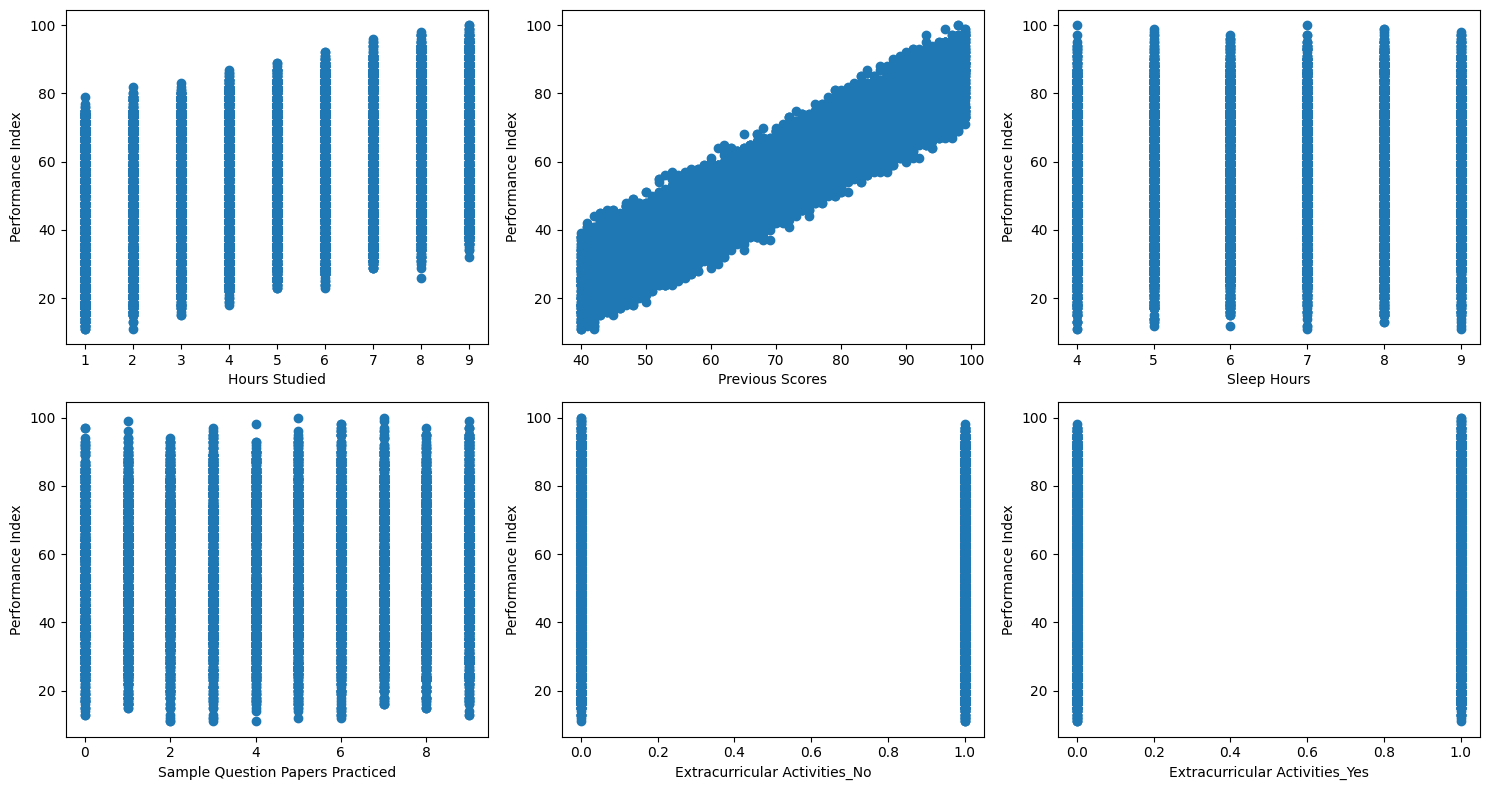

In [19]:
# plot all features based on performance index individually
features = [feature for feature in train_data.columns if feature != target_col]
cols = 3
rows = math.ceil(len(features) / cols)
plt.figure()
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    # Convert y_train to a DataFrame with the same index as X_train
    ax = axes[i]
    ax.scatter(train_data[feature], train_data[target_col])
    ax.set_xlabel(feature)
    ax.set_ylabel(target_col)

plt.tight_layout()
plt.show()

#### Correlation

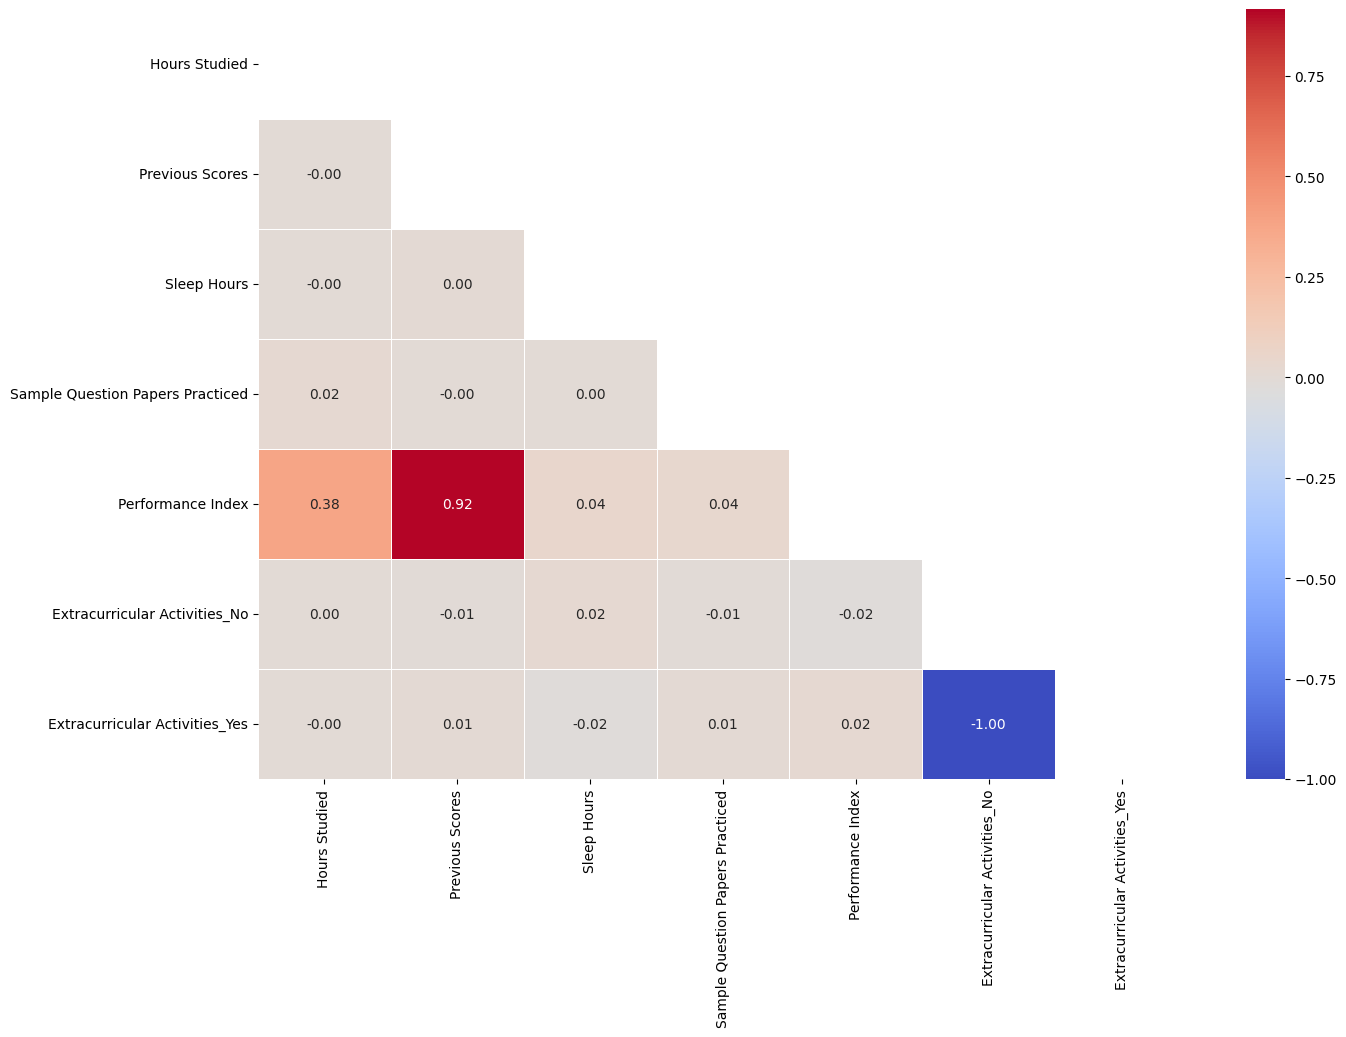

In [17]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(15, 10))
# mask upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths="0.5",
)
plt.show()

sss
